# Data Exploration of PISA report: Relationships Between Student Performance, Socioeconomic Status and Internet Access

## by Alfredo Yigal Núñez Varillas

____

### Brief introduction to the PISA report

Having a good education is one of the most important factors for a person to fully develop their skills, be able to provide a better quality of life for themselves and their families, and contribute to the economic development of their community. This is well known by different governments worldwide, which is why more and more States are investing in knowing the educational level of their population, the results of their educational efforts and how to improve it. One of the reports that help this goal is the PISA report.

The PISA report, from the acronym Program for International Student Assessment, is an OECD program that measures the performance of 15-year-old students in three competencies of importance for their development in the adult world: reading, mathematics and natural sciences. This program is done every three years and allows the different governments to have comparable data in order to have a better knowledge of the performance of their students and improve their educational policies. The program started in the year 2000, participating 32 countries. Since then, the PISA study has grown to involve 65 economies worldwide for the 2012 report. 

The main objective of the PISA report is not to test the student's knowledge, but to measure their aptitudes and abilities relevant for an optimal development in the adult world. The study focuses on 15-year-old students as this is the age where compulsory education is commonly completed.

### Introduction to the PISA dataset

In this project, we will explore the data obtained in the PISA report of 2012. The database, which can be obtained [here](https://www.oecd.org/pisa/pisaproducts/pisa2012database-downloadabledata.htm), has information on 485490 students of 15 years from 65 countries worldwide. One of the most outstanding points of the PISA report is the amount of information that was collected. Not only basic data such as country, age and score was obtained; but rich and varied data, from quantity of books in the student's house, educational level of their parents, access to Internet, etc.

In this project, we will analyze the following points

- What are the differences between the results of boys and girls?
- Is there any relationship between students who arrive late, skip a class or miss a whole school day and a lower performance on the study?
- Is there any difference in results between students who have access to the internet and those who do not?
- Is there any relationship between the economic-socio-cultural level of the student and his performance in the test?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Import col types
col_dtype_series = pd.read_pickle("clean_pisa_cols.pkl")
col_dtype_dict = col_dtype_series.to_dict()

# read PISA data.
pisa_df = pd.read_csv('clean_pisa_data.csv', dtype = col_dtype_dict) 

# Drop nan rows in ESCS column
eco_soc_cul_status_not_nan = pisa_df[~pisa_df.ESCS.isna()]

In [3]:
bins = (np.percentile(eco_soc_cul_status_not_nan.ESCS, 0), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 25), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 50), 
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 75),
        np.percentile(eco_soc_cul_status_not_nan.ESCS, 100))

eco_socio_cultural_levels = ['4', '3', '2', '1']

pisa_df['ESC_Level'] = pd.cut(pisa_df['ESCS'], bins, labels=eco_socio_cultural_levels)

First, let's get an overview of the DF to analyze. Who are the students who participated in the PISA Report?

**Basically, the same number of girls and boys participated.**

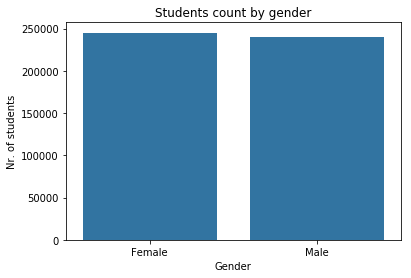

In [4]:
# Amount of boys and girls participating in the study

# Set a basic color for the visualizations
base_color = sb.color_palette()[0]

# Plot gender count
sb.countplot(data = pisa_df, x = 'gender', color=base_color)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Gender')
plt.title('Students count by gender');

**Almost 5000 students took this test for the vast majority of countries. Notable exceptional cases are those of Mexico, Italy, Spain, Canada and Brazil.**

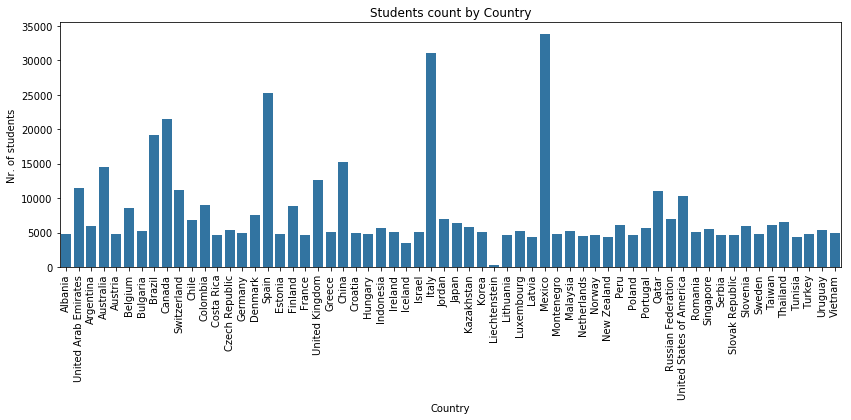

In [5]:
# Create a figure with appropriate proportions
plt.figure(figsize=[14, 4.5])

# Count students by country
sb.countplot(data = pisa_df, x = 'country', color = base_color)
plt.xticks(rotation = 90)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Country')
plt.title('Students count by Country');

**Most of the students in the PISA Report were between -2 and 1.5 of the PISA Index of Economic, Social and Cultural Status (ESCS).**

In order to facilitate the analysis, we have created four levels of ECS, distributing the students in each level in equal numbers.

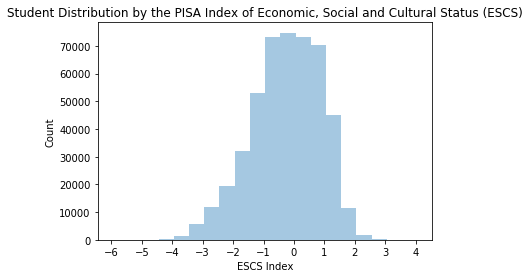

In [6]:
# Bins
bins = np.arange(pisa_df.ESCS.min(), pisa_df.ESCS.max() + 0.5, 0.5)

# Plot distribution
sb.distplot(eco_soc_cul_status_not_nan.ESCS, kde=False, bins=bins)

plt.xticks([-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4])

# Set labels and title
plt.ylabel('Count')
plt.xlabel('ESCS Index')
plt.title('Student Distribution by the PISA Index of Economic, Social and Cultural Status (ESCS)');

**Let's now see the distribution of Math, Reading and Science Scores.**

The vast majority of students score between 300 and 600

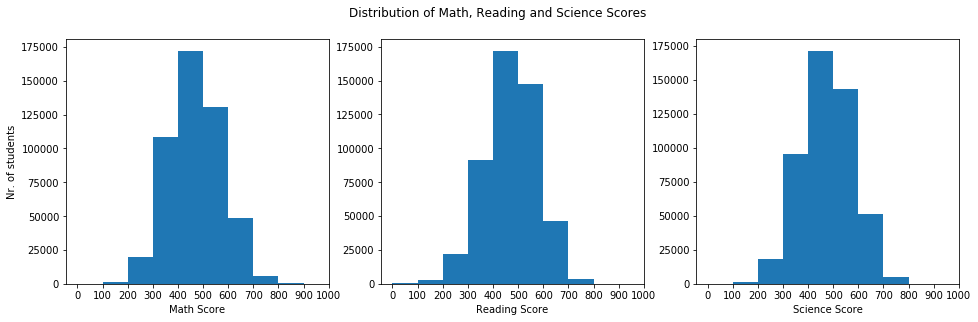

In [7]:
# Create a figure with appropriate proportions
fig, ax = plt.subplots(ncols=3, figsize = [16, 4.5])

scores_data = ['math_score', 'reading_score', 'science_score']
score_x_label = ['Math Score', 'Reading Score', 'Science Score']

y_ticks = np.arange(0, 200000, 25000)

# Iterate to create 3 charts
for i in range(len(scores_data)):
    score_data = scores_data[i]
    score_label = score_x_label[i]
    bins = np.arange(0, 1000, 100)
    ax[i].hist(data = pisa_df, x = score_data, bins=bins)
    ax[i].set_xlabel(score_label)
    ax[i].set_xticks(np.arange(0, max(pisa_df[score_data])+100, 100))
    ax[i].set_yticks(y_ticks)

# Set labels and title
ax[0].set_ylabel('Nr. of students')
fig.suptitle('Distribution of Math, Reading and Science Scores');

**There are more students who accepted to have arrived late to school than those who accepted to have skipped a class within school or skipped a whole school day.**

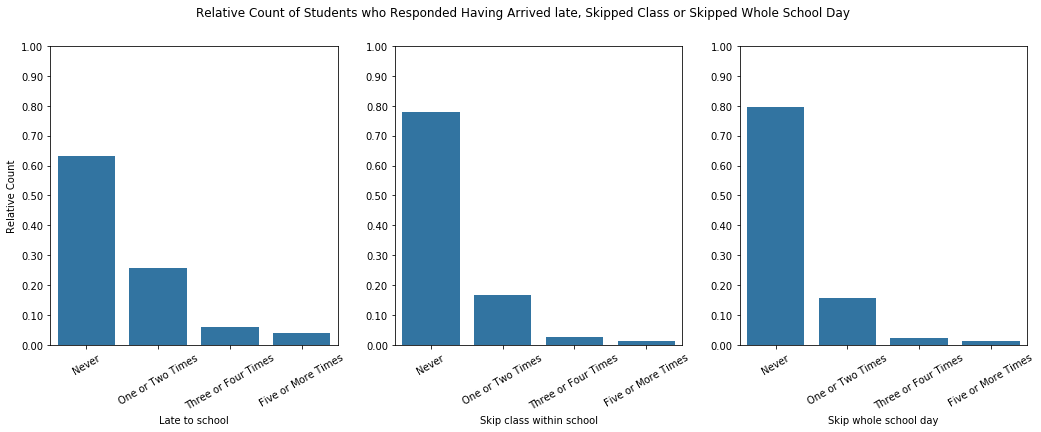

In [8]:
# Create a new figure
fig = plt.figure(figsize = [17.5, 5.5])
  
plt.ylabel('Relative Count')

# Iterate to create 3 charts in one figure
truancy_variables = ['late_to_school', 'skip_class_within_school', 'skip_whole_school_day']
trauncy_labels = ['Late to school', 'Skip class within school', 'Skip whole school day']

for i in range(len(truancy_variables)):
    plt.subplot(1, 3, i+1)
    trauncy_data = truancy_variables[i]
    sb.countplot(data = pisa_df, x = trauncy_data, color = base_color)
    plt.yticks(y_ticks)
    plt.xlabel(trauncy_labels[i])
    
    total_var_data = pisa_df[trauncy_data].shape[0]
    go_by = total_var_data/10
    
    ticks = np.arange(0, total_var_data + go_by, go_by)
    relative_ticks = np.arange(0, 1.1, 0.1)
    plt.ylim(0, total_var_data)
    
    relative_ticks = ['{:0.2f}'.format(relative_ytick) for relative_ytick in relative_ticks]
    
    plt.yticks(ticks, relative_ticks)
    plt.xticks(rotation=30)
    
    if i == 0:
        plt.ylabel('Relative Count')
    else:
        plt.ylabel('')
    

fig.suptitle('Relative Count of Students who Responded Having \
Arrived late, Skipped Class or Skipped Whole School Day');

**Most of the students have interent at home and use it. In a smaller number, some claim not to have internet at home and the minority claims to have internet at home and do not use it.**

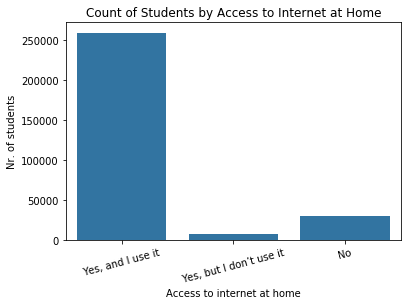

In [9]:
sb.countplot(data=pisa_df, x = 'internet_home', color = base_color)
plt.xticks(rotation=15)

# Set labels and title
plt.ylabel('Nr. of students')
plt.xlabel('Access to internet at home')
plt.title('Count of Students by Access to Internet at Home');

## 1. Girls vs Boys: What are the differences between their results?

For Math and Science, Girls and Boy get almost the same score...

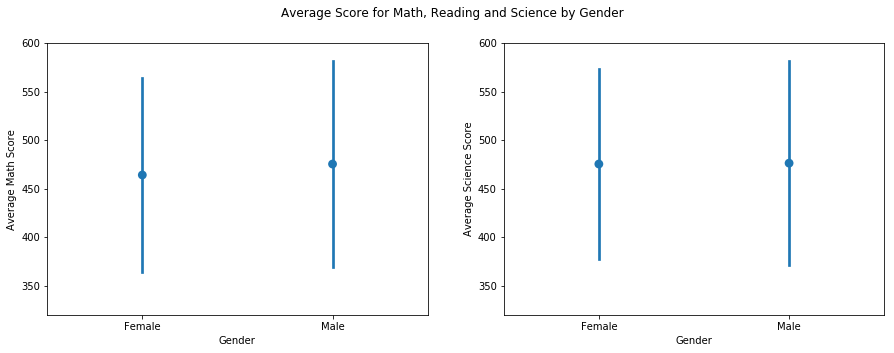

In [10]:
# Create a figure with appropriate proportions
fig = plt.figure(figsize = [15, 5])

scores = ['math_score', 'science_score'] 
score_x_label = ['Average Math Score', 'Average Science Score']


# Iterate to create 3 charts in 1 figure
for i in range(len(scores)):
    score_label = score_x_label[i]
    plt.subplot(1, 2, i +1)
    sb.pointplot(data = pisa_df, x = 'gender', y = scores[i], ci = 'sd', linestyles='')
    plt.ylim(320, 600)
    plt.ylabel(score_label)
    plt.xlabel('Gender')
    
# Set title
fig.suptitle('Average Score for Math, Reading and Science by Gender');

But in Reading, on average, girls get highers scores.

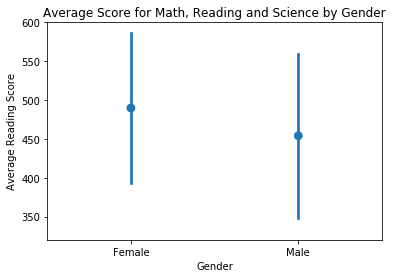

In [11]:

sb.pointplot(data = pisa_df, x = 'gender', y = 'reading_score', ci = 'sd', linestyles='')
plt.ylim(320, 600)
plt.ylabel('Average Reading Score')
plt.xlabel('Gender')
    
# Set title
plt.title('Average Score for Math, Reading and Science by Gender');

**In every country!**

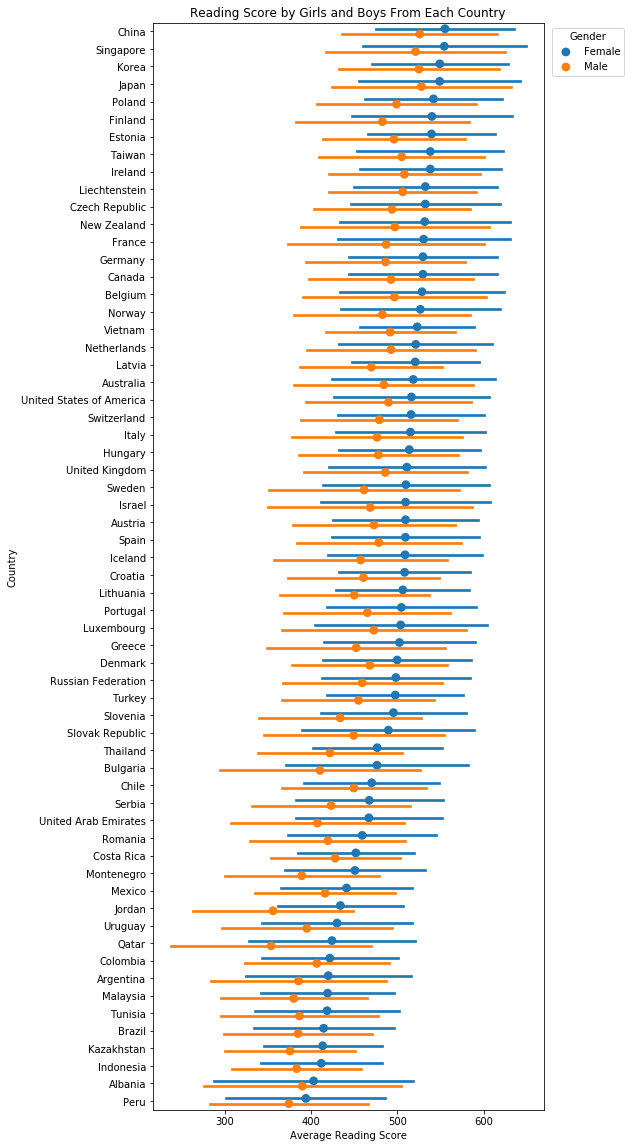

In [12]:
# Create figure
plt.figure(figsize = [7, 20])

# Order countries by girls' performance
read_score_order = pisa_df.query('gender == "Female"').groupby('country').mean().reading_score.sort_values(ascending=False).index

# Plot
sb.pointplot(data = pisa_df, y = 'country', x = 'reading_score', hue = "gender", ci='sd', linestyles="", dodge=0.3, order=read_score_order);

# Set title and labels
plt.ylabel('Country')
plt.xlabel('Average Reading Score')
plt.title('Reading Score by Girls and Boys From Each Country')
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), title='Gender');

## 2. Internet Access at Home: Is there any difference in results between students who have access to the internet and those who do not?

There seem to be a relationship between using internet and a higher score in Math, Reading and Science.

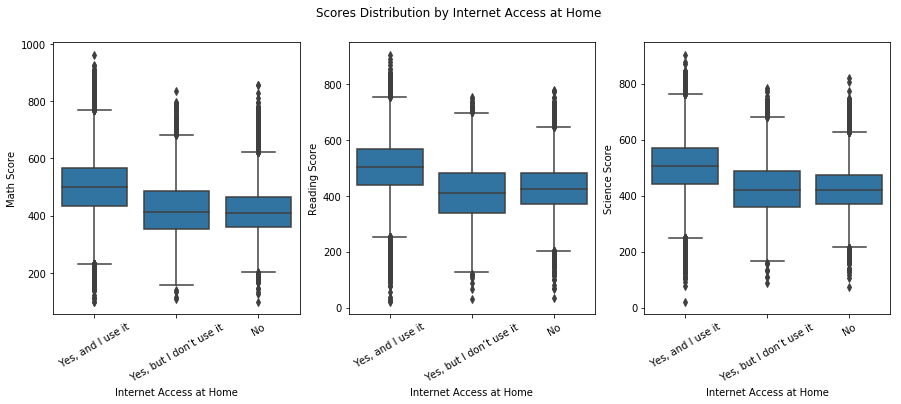

In [13]:
# Create Figure
fig = plt.figure(figsize=[15, 5])

# Plot all charts
plt.subplot(1, 3, 1)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'math_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Math Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 2)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'reading_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Reading Score")
plt.xticks(rotation=30)

plt.subplot(1, 3, 3)
sb.boxplot(data = pisa_df, x = 'internet_home', y = 'science_score', color=base_color)
plt.xlabel("Internet Access at Home")
plt.ylabel("Science Score")
plt.xticks(rotation=30)

fig.suptitle('Scores Distribution by Internet Access at Home');

## 3. Is there any relationship between students who arrive late, skip a class or miss a whole school day and a lower performance on the study?

The more times a student arrives late, skips a class or skips a day of school, the lower their performance on the tests. The behaviour that has the worse relationship with the score obtained is 'skip whole school day'. For example, while those students who claim to never have missed school have an average of 1450 points in the "combined score", students who claim to have missed 5 or more times have on average only 1200 points.

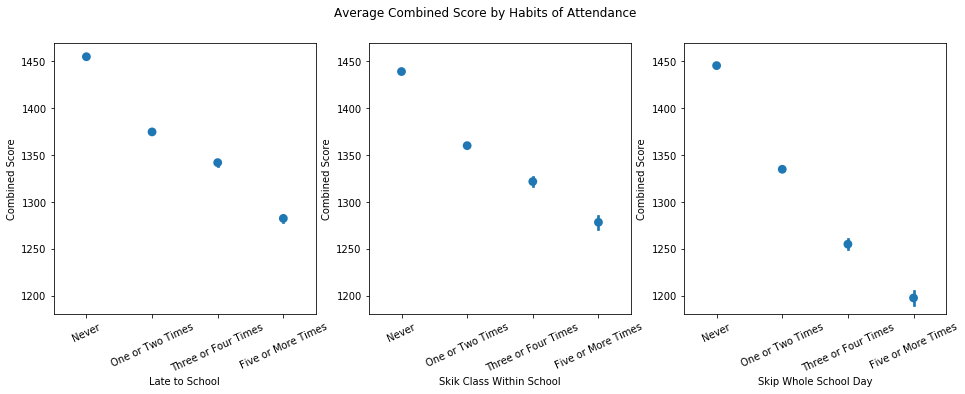

In [14]:
# New figure
fig=plt.figure(figsize = [16, 5])

trauncy_list = ['late_to_school', 'skip_class_within_school', 'skip_whole_school_day']
trauncy_labels = ['Late to School', 'Skik Class Within School', 'Skip Whole School Day']

graph_index = 1

# Iterate to create 3 charts
for trauncy in trauncy_list:
    plt.subplot(1, 3, graph_index)
    sb.pointplot(data=pisa_df, x = trauncy, y = 'comb_score', linestyles='')
    plt.xticks(rotation=25)
    plt.ylim(1180, 1470)
    plt.xlabel(trauncy_labels[graph_index-1])
    graph_index += 1
    plt.ylabel("Combined Score")

fig.suptitle('Average Combined Score by Habits of Attendance');

## 4. Is there any relationship between the economic-socio-cultural level of students and their performance in the test?

Yes there is. The higher the ECS Level, the higher the scores tend to be.

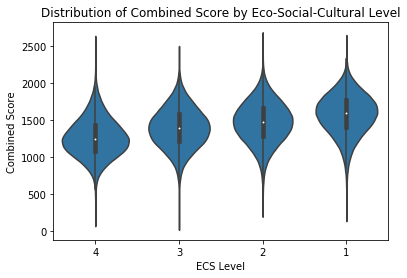

In [15]:
# Plot Chart
sb.violinplot(data = pisa_df, x = 'ESC_Level', y = 'comb_score', color=base_color)

# Set labels and title
plt.ylabel('Combined Score')
plt.xlabel('ECS Level')
plt.title('Distribution of Combined Score by Eco-Social-Cultural Level');

## A higher ECS Level is related to higher scores in every region of the world!

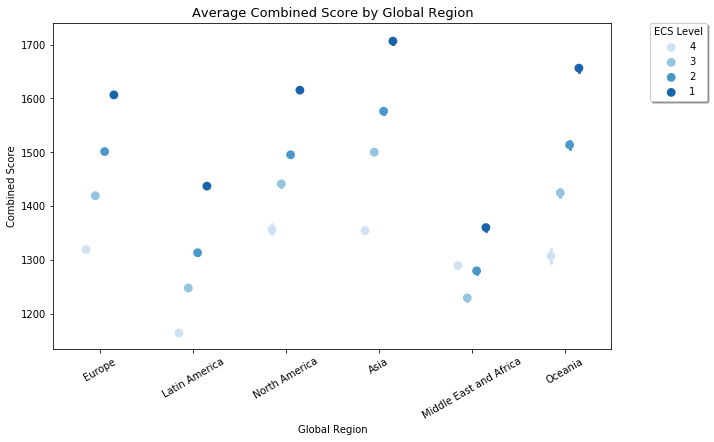

In [16]:
plt.figure(figsize=[10, 6])
sb.pointplot(data = pisa_df, x = 'global_region', y = 'comb_score', 
             hue = "ESC_Level", dodge=0.3, linestyles='', palette='Blues')

plt.xticks(rotation=30)

# Set title and labels
plt.ylabel('Combined Score')
plt.xlabel('Global Region')
plt.title('Average Combined Score by Global Region', size = 13)
plt.legend(loc='upper center', bbox_to_anchor=(1.12, 1.015), shadow=True, title = 'ECS Level');

From all the information obtained in this phase, we can say that eco-socio-cultural level is related to student performance.

We also saw that not having access to the internet or incurring bad habits of attendance are also related to poor performance in the PISA study.

The question we ask ourselves now is the following: **What if these last two points are consequences of a low eco-socio-cultural level and actually this is the true variable related to low student performance?**

## Use of internet is related to a higher score in every ECS level.

Regardless of the eco-socio-cultural stratum, access to the internet is related to a higher score.

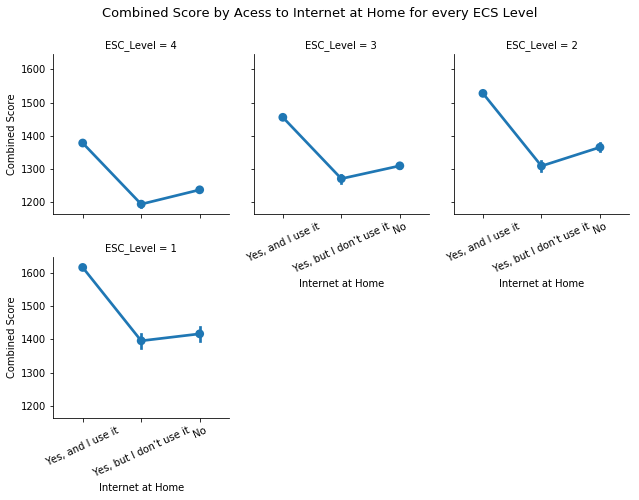

In [17]:
g = sb.FacetGrid(data=pisa_df, col='ESC_Level', margin_titles = True, col_wrap=3)
g.map(sb.pointplot, 'internet_home', 'comb_score', alpha = 0.3, order = pisa_df.internet_home.cat.categories)

# Set titles and labels
g.set_ylabels('Combined Score')
g.set_xlabels('Internet at Home')
g.fig.suptitle('Combined Score by Acess to Internet at Home for every ECS Level', y = 1.05, size=13)
[plt.setp(ax.get_xticklabels(), rotation=25) for ax in g.axes.flat];

## Relationship between every ECS Level and times students skip a whole school day.

What we found is that the lower the ECS Level, more students accepted to have skipped a whole school day.

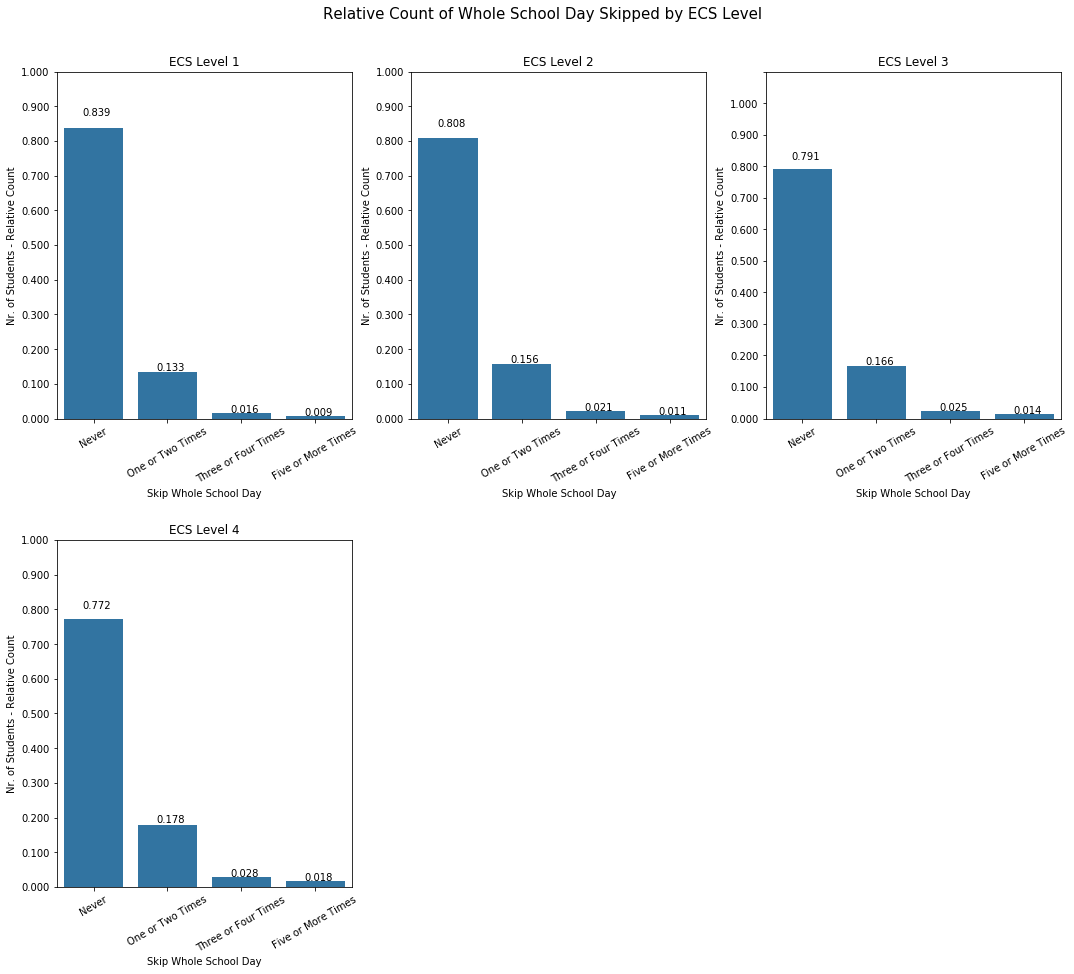

In [18]:
escl_1 = pisa_df.query('ESC_Level == "1"')
escl_2 = pisa_df.query('ESC_Level == "2"')
escl_3 = pisa_df.query('ESC_Level == "3"')
escl_4 = pisa_df.query('ESC_Level == "4"')
#escl_5 = pisa_df.query('ESC_Level == "5"')


escl_list = [escl_1, escl_2, escl_3, escl_4]


fig = plt.figure(figsize = [18, 15])

for i in range(len(escl_list)):
    
    skip = escl_list[i]['skip_whole_school_day'].value_counts()
    
    plt.subplot(2, 3, i+1)
    # Plot
    sb.countplot(data = escl_list[i], x = 'skip_whole_school_day', color = base_color);

    # In order to get a relative count, I'll just convert the y ticks
    total_escl_data = escl_list[i].shape[0]
    go_by = total_escl_data/10
    ticks = np.arange(0, total_escl_data + go_by, go_by)
    relative_ticks = np.arange(0, 1.1, 0.1)
    relative_ticks = ['{:0.3f}'.format(relative_ytick) for relative_ytick in relative_ticks]

    # Modify the Y ticks
    plt.yticks(ticks, relative_ticks)
    plt.ylabel('Nr. of Students - Relative Count')
    plt.xlabel('Skip Whole School Day')
    plt.xticks(rotation = 30)
    title = 'ECS Level ' + str(i+1)
    plt.title(title)

    # Plot text for each bar
    for i in range(skip.shape[0]):
        count = '{:0.3f}'.format(skip[i] / total_escl_data)
        plt.text(i-0.15, skip[i] * 1.04, count, color = "black");


# Adjust Plot and set Title
plt.subplots_adjust(hspace = .35)
fig.suptitle('Relative Count of Whole School Day Skipped by ECS Level', y = 0.94, size=15);